# Assignment 3

### Phase 0 — Data Preparation

an existing data set called the “Pima Indians Diabetes Database” provided by the UCI Machine Learning Repository is downloaded locally

### Phase 1 — Data Exploration

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabetes = pd.read_csv('./diabetes.csv')
print(diabetes.columns )

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
# examining the data set using the pandas’ head() method
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# find the dimensions of the data set using the panda Dataframes’ ‘shape’ attribute.
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


‘Outcome’ is the column which we are going to predict, which says if the patient is diabetic or not. 1 means the person is diabetic and 0 means a person is not. We can identify that out of the 768 persons, 500 are labeled as 0 (non-diabetic) and 268 as 1 (diabetic)

In [7]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

find the data distribution of the features

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

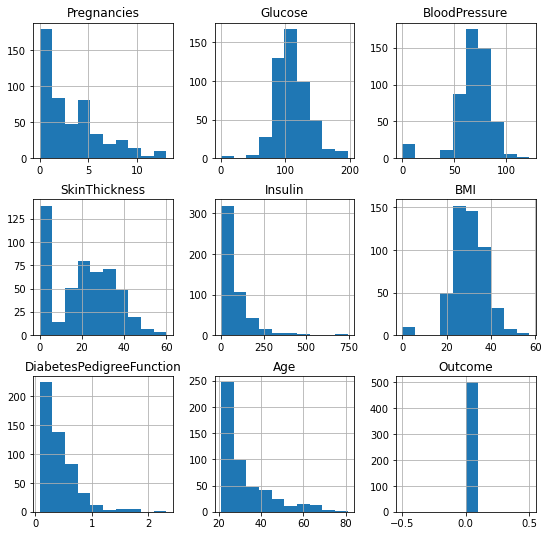

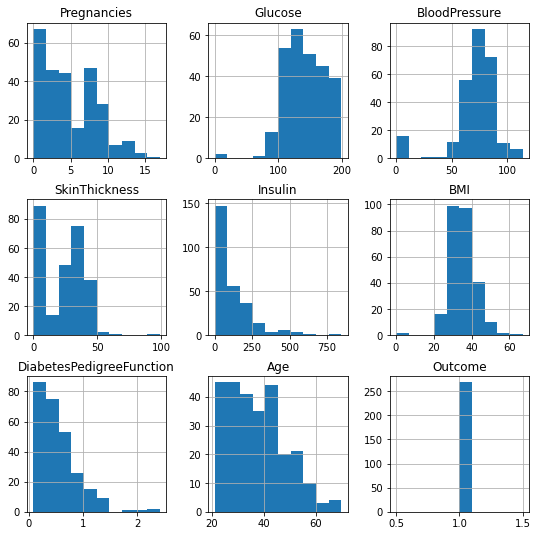

In [12]:
diabetes.groupby('Outcome').hist(figsize=(9, 9))

### Phase 2— Data Cleaning
#### “Better data beats fancier algorithms”


1. Duplicate or irrelevant observations.
2. Bad labeling of data, same category occurring multiple times.
3. Missing or null data points.
4. Unexpected outliers.

In [13]:
#find any missing or null data points of the data set (if there is any) using the following pandas function.
diabetes.isnull().sum()
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
# Unexpected Outliers
print("Total : ", diabetes[diabetes.BloodPressure == 0].shape[0])
print()

print(diabetes[diabetes.BloodPressure == 0].groupby('Outcome')['Age'].count())

Total :  35

Outcome
0    19
1    16
Name: Age, dtype: int64


In [16]:
print("Total : ", diabetes[diabetes.Glucose == 0].shape[0])
print()
print(diabetes[diabetes.Glucose == 0].groupby('Outcome')['Age'].count())

Total :  5

Outcome
0    3
1    2
Name: Age, dtype: int64


In [17]:
print("Total : ", diabetes[diabetes.SkinThickness == 0].shape[0])
print()
print(diabetes[diabetes.SkinThickness == 0].groupby('Outcome')['Age'].count())

Total :  227

Outcome
0    139
1     88
Name: Age, dtype: int64


In [18]:
print("Total : ", diabetes[diabetes.BMI == 0].shape[0])
print()
print(diabetes[diabetes.BMI == 0].groupby('Outcome')['Age'].count())

Total :  11

Outcome
0    9
1    2
Name: Age, dtype: int64


In [19]:
print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])
print()
print(diabetes[diabetes.Insulin == 0].groupby('Outcome')['Age'].count())


Total :  374

Outcome
0    236
1    138
Name: Age, dtype: int64


By the end of the data cleaning process, we have come to the conclusion that this given data set is incomplete. Since this is a demonstration for machine learning we will proceed with the given data with some minor adjustments.
We will remove the rows which the “BloodPressure”, “BMI” and “Glucose” are zero.

In [20]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


### Phase 3— Feature Engineering
“ Feature engineering enables us to highlight the important features and facilitate to bring domain expertise on the problem to the table. It also allows avoiding overfitting the model despite providing many input features”.

In [21]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

### Phase 4— Model Selection
Model selection or algorithm selection phase is the most exciting part of machine learning. It is the phase where we select the model which performs best for the data set at hand.

Calculating the “Classification Accuracy (Testing Accuracy)” of a given set of classification models with their default parameters to determine which model performs better with given diabetes data set.
We will import the necessary libraries for the notebook. We import 7 classifiers namely K-Nearest Neighbors, Support Vector Classifier, Logistic Regression, Gaussian Naive Bayes, Random Forest, and Gradient Boost to be contenders for the best classifier. These machine learning algorithms can be easily implemented using "sklearn" library.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

#### K-Fold Cross-Validation
This method splits the data set into K equal partitions (“folds”), then use 1 fold as the testing set and the union of the other folds as the training set. Then the model is tested for accuracy. The process will follow the above steps K times, using different folds as the testing set each time. The average testing accuracy of the process is the testing accuracy.


Pros : More accurate estimate of out-of-sample accuracy. More “efficient” use of data (every observation is used for both training and testing)

Cons : Much slower than Train/Test split.

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import sklearn

names = []
scores = []
for name, model in models:
    
    kfold = sklearn.model_selection.KFold(n_splits=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

  Name     Score
0  KNN  0.719787
1  SVC  0.758581
2   LR  0.766667
3   DT  0.698858
4  GNB  0.757021
5   RF  0.779243
6   GB  0.775038


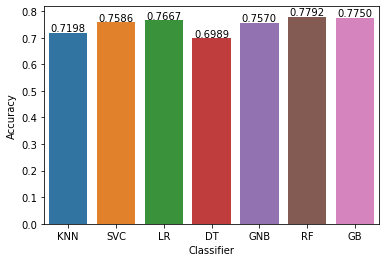

In [32]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

#####  Successfully implemented basic machine learning workflow steps such as data exploration, data cleaning steps, feature engineering basics and model selection using Scikit Learn library!